# Proyek Analisis Data: Bike-sharing
- **Nama:** Ali Samsul Latupono
- **Email:** m183m183b4ky0372@bangkit.academy
- **ID Dicoding:** ali_samsul_latupono


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : bagaimana pengaruh kondisi cuaca terhadapa jumlah penyewaan sepeda per jam dan per hari?
- Pertanyaan 2 : apakah ada hubuungan antara suhu(tempp) dan jumlah penyewaan sepeda(cnt) di hari kerja(workingday) dan hari libur(holiday)

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

## **Menilai tabel day.csv**

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [19]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [20]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


## **Menilai table hour.csv**

In [26]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [18]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [16]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


**Insight:**
- xxx
- xxx

### Cleaning Data

## Membersihkan tabel day.csv dan hour.csv

In [32]:
# menangani Nilai hilang(missing value)
print("Jumlah missing value day: ", day_df.isna().sum())
print()
print("Jumlah missing value hou: ", hour_df.isna().sum())

Jumlah missing value day:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah missing value hou:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [34]:
# Menghapus tabel duplikat jika ada

day_df.dropna(inplace=True)
day_df.drop_duplicates(inplace=True)
hour_df.dropna(inplace=True)
hour_df.drop_duplicates(inplace=True)

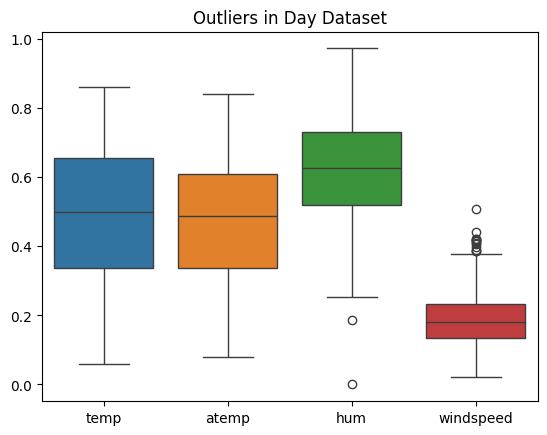

In [43]:
# Melihat pakah ada outliner pada kolom numerik

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figuresize=(10, 6)
sns.boxplot(data=day_df[['temp', 'atemp', 'hum', 'windspeed']])
plt.title('Outliers in Day Dataset')
plt.show()

In [49]:
# Menghapus outlier

Q1 = day_df[['temp','atemp','hum','windspeed']].quantile(0.25)
Q3 = day_df[['temp','atemp','hum','windspeed']].quantile(0.75)
IQR = Q3 - Q1

#menentukan mask outlier
mask = ~((day_df[['temp', 'atemp', 'hum', 'windspeed']] < (Q1 - 1.5 * IQR)) |
          (day_df[['temp', 'atemp', 'hum', 'windspeed']] > (Q3 + 1.5 * IQR)))

# Mengambil data tanpa outlier
day_df_clean = day_df[mask.all(axis=1)]

day_df_clean.shape
print(day_df_clean.info)

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspee

## Exploratory Data Analysis (EDA)

### proses

In [50]:
# Ringkasan statistik
print(day_df_clean.describe())

          instant     season          yr        mnth     holiday     weekday  \
count  717.000000  717.00000  717.000000  717.000000  717.000000  717.000000   
mean   366.779637    2.51325    0.499303    6.562064    0.029289    2.995816   
std    210.971354    1.10555    0.500349    3.439113    0.168732    2.001741   
min      1.000000    1.00000    0.000000    1.000000    0.000000    0.000000   
25%    185.000000    2.00000    0.000000    4.000000    0.000000    1.000000   
50%    365.000000    3.00000    0.000000    7.000000    0.000000    3.000000   
75%    550.000000    3.00000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.00000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  717.000000  717.000000  717.000000  717.000000  717.000000  717.000000   
mean     0.684798    1.396095    0.497365    0.476252    0.631562    0.186287   
std      0.464921    0.543511    0.1

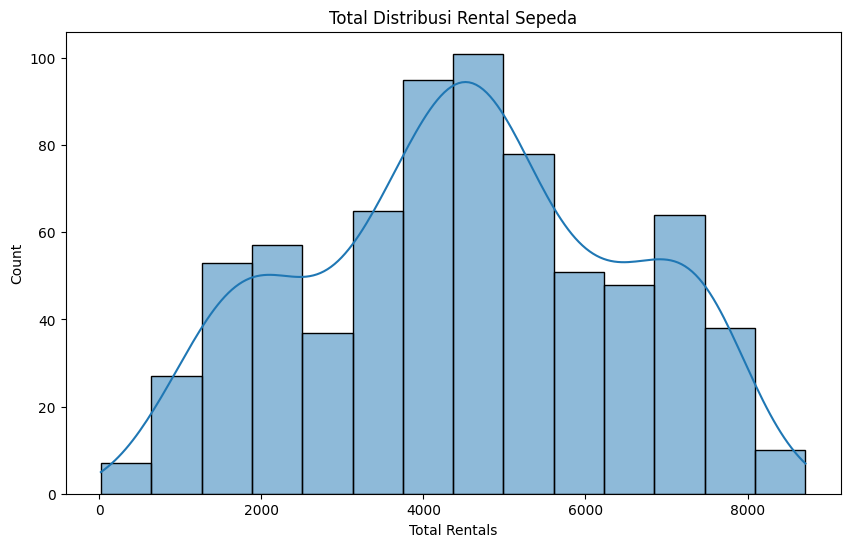

In [56]:
plt.figure(figsize=(10,6))
sns.histplot(day_df['cnt'], kde=True)
plt.title('Total Distribusi Rental Sepeda')
plt.xlabel('Total Rentals')
plt.show()

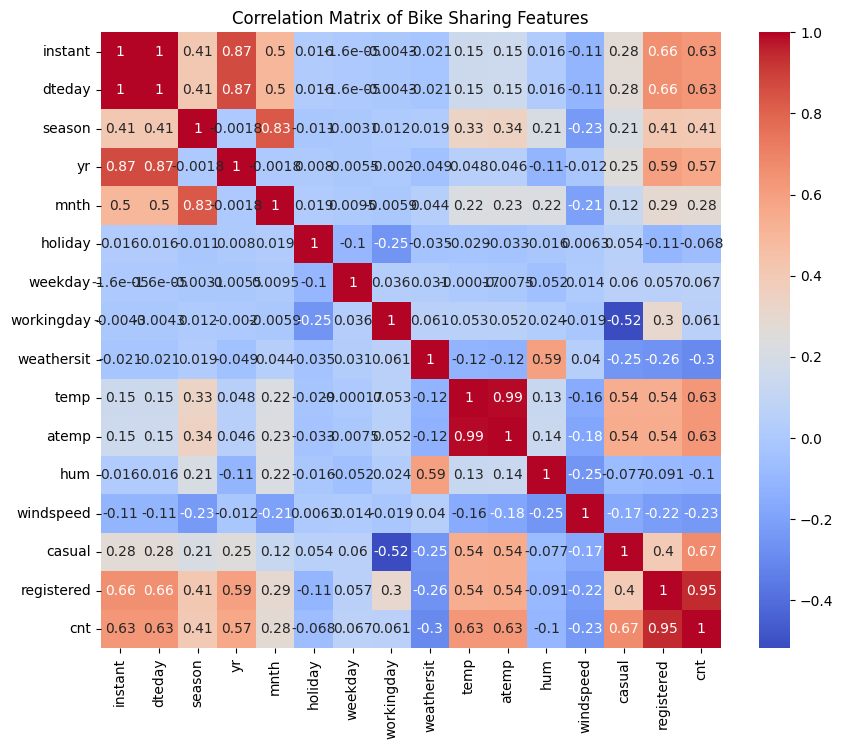

In [58]:
# Menguybah format agar dapat melihat korelasi
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
numeric_columns = day_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10,8))
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Bike Sharing Features')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

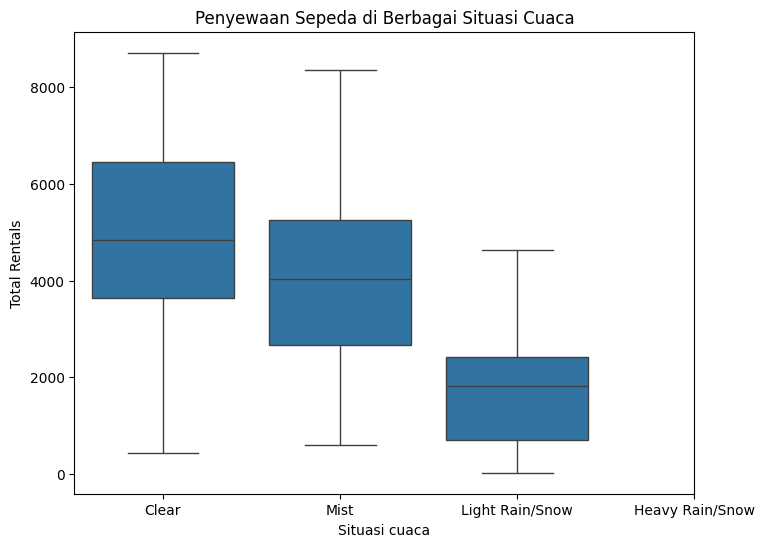

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Penyewaan Sepeda di Berbagai Situasi Cuaca')
plt.xlabel('Situasi cuaca')
plt.ylabel('Total Rentals')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.show()

### Pertanyaan 2:

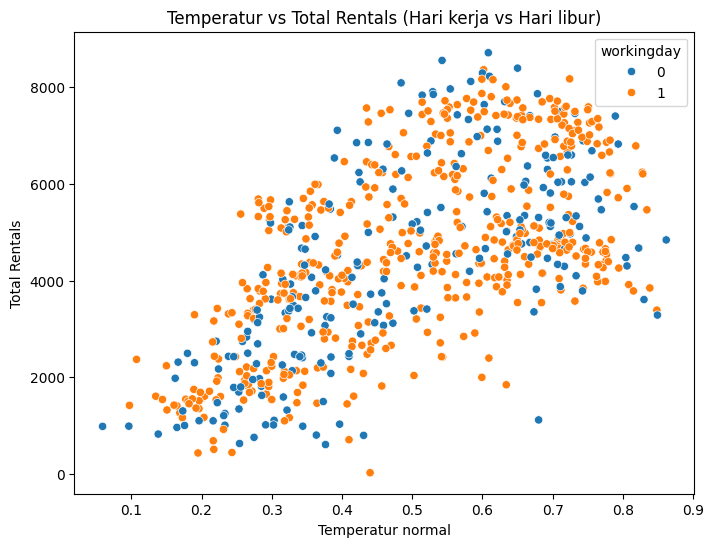

workingday      
0           temp    0.653341
1           temp    0.610766
Name: cnt, dtype: float64


In [73]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', hue='workingday', data=day_df_clean)
plt.title('Temperatur vs Total Rentals (Hari kerja vs Hari libur)')
plt.xlabel('Temperatur normal')
plt.ylabel('Total Rentals')
plt.show()

correlation_results = day_df_clean.groupby('workingday')[['temp', 'cnt']].corr().iloc[0::2, -1]
print(correlation_results)

## Analisis Lanjutan (Opsional)

## Proses Training data

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Target feature dan variabel
x = day_df_clean[['temp','hum','windspeed']]
y = day_df_clean['cnt']

# Membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Regresi
model = LinearRegression()
model.fit(x_train, y_train)



LinearRegression()

In [78]:
# Prediksi
y_pred = model.predict(x_test)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 6546.92073155 -3157.41080376 -4633.95545695]
Model Intercept: 4133.692352557193


### RFM

   instant  Recency  Frequency  Monetary
0        1      730          1       985
1        2      729          1       801
2        3      728          1      1349
3        4      727          1      1562
4        5      726          1      1600


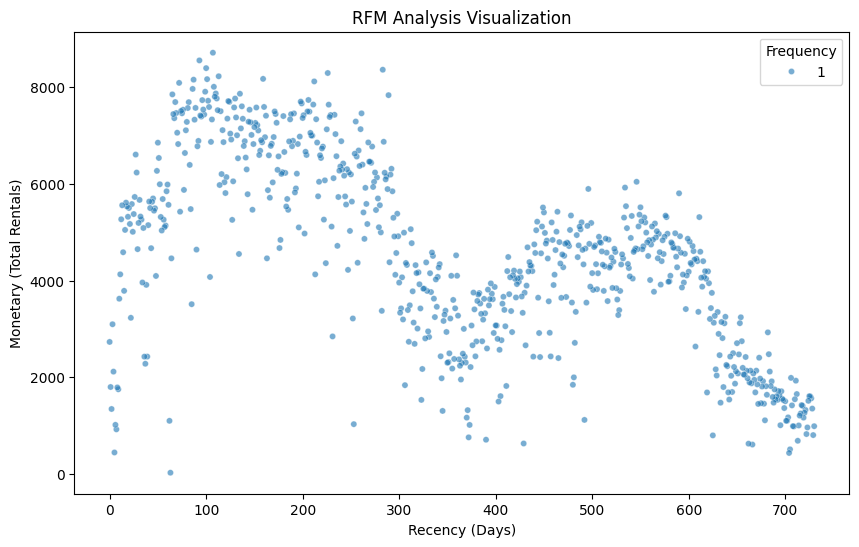

In [80]:
import datetime as dt

# Menghitung hari sejak terakhir penyewaan
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
max_date = day_df['dteday'].max()

# Membuat kolom 'Recency', 'Frequency', dan 'Monetary'
rfm = day_df.groupby('instant').agg({
    'dteday': lambda x: (max_date - x.max()).days,  # Recency
    'cnt': ['count', 'sum']  # Frequency (count) dan Monetary (sum)
}).reset_index()

# Mengganti nama kolom
rfm.columns = ['instant', 'Recency', 'Frequency', 'Monetary']  # Pastikan nama kolom cocok

# Menampilkan skor RFM
print(rfm.head())

# Visualisasi RFM
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Monetary', data=rfm, hue='Frequency', size='Frequency', sizes=(20, 200), alpha=0.6)
plt.title('RFM Analysis Visualization')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary (Total Rentals)')
plt.legend(title='Frequency')
plt.show()


### **Geospatial**


In [83]:
import folium
m = folium.Map(location=[38.89511, -77.03637], zoom_start=12)

# Menambahkan contoh
folium.Marker([-7.756232616753011, 110.4096471803108], popup="Location 1").add_to(m)
folium.Marker([-7.759697603491713, 110.40896026930868], popup="Location 2").add_to(m)

# Menampilan map
m

## **Clustering**

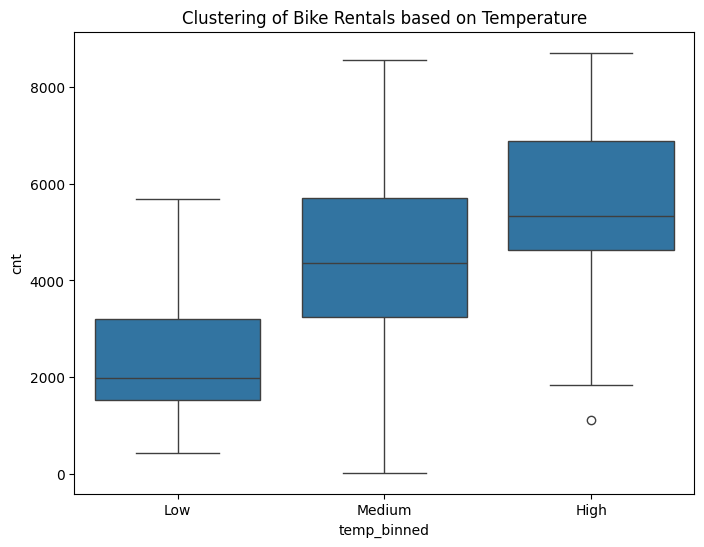

In [84]:
# Contoh
bins = [0, 0.3, 0.6, 1]
labels = ['Low', 'Medium', 'High']
day_df['temp_binned'] = pd.cut(day_df['temp'], bins=bins, labels=labels)

# Visualisasi clustering
plt.figure(figsize=(8,6))
sns.boxplot(x='temp_binned', y='cnt', data=day_df)
plt.title('Clustering of Bike Rentals based on Temperature')
plt.show()

## Conclusion

- Cuaca memiliki dampak signifikan terhadapa penyewaan sepeda, dengan kondisi cerah akan menunjukkan penyewan yang tinggi
- Suhu juga sangan mempengaruhi penyewaan, terutama pada hari kerja dibandingkan dengan hari libur
- melalui RFM, dapat dilihat bagaimana perilaku penyewaan yang variatif, tergantung frekuensi, waktu, dan jumlah sepeda yang disewa
- Geospatial dan clustering menunjukkan adanya potensi untuk memetakkan area penggunaan sepeda yang lebih intensif